In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Uber_Request_Data_Cleaned.csv", parse_dates=["Request timestamp", "Drop timestamp"])


In [11]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (6745, 6)
Columns: ['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp']
Data Types:
 Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [13]:
display(df.head())
display(df.tail())

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00
1,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
2,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00
3,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT
6741,6756,City,137.0,Trip Completed,2016-07-15 23:57:25,2016-07-16 00:51:09
6742,6755,Airport,113.0,Trip Completed,2016-07-15 23:57:32,2016-07-16 01:09:24
6743,6759,City,125.0,Cancelled,2016-07-15 23:59:29,NaT
6744,6757,Airport,251.0,Trip Completed,2016-07-15 23:59:58,2016-07-16 00:30:17


In [15]:
display(df.describe(include='all'))

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768
min,1.000000,NaN,1.000000,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00
25%,1691.000000,NaN,75.000000,NaN,2016-07-12 07:51:00,2016-07-12 07:42:00
50%,3387.000000,NaN,149.000000,NaN,2016-07-13 14:23:37,2016-07-13 12:14:06
75%,5080.000000,NaN,224.000000,NaN,2016-07-14 19:39:27,2016-07-14 19:13:52
max,6766.000000,NaN,300.000000,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24


In [17]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Request id: 6745 unique values
Pickup point: 2 unique values
Driver id: 300 unique values
Status: 3 unique values
Request timestamp: 5618 unique values
Drop timestamp: 2598 unique values


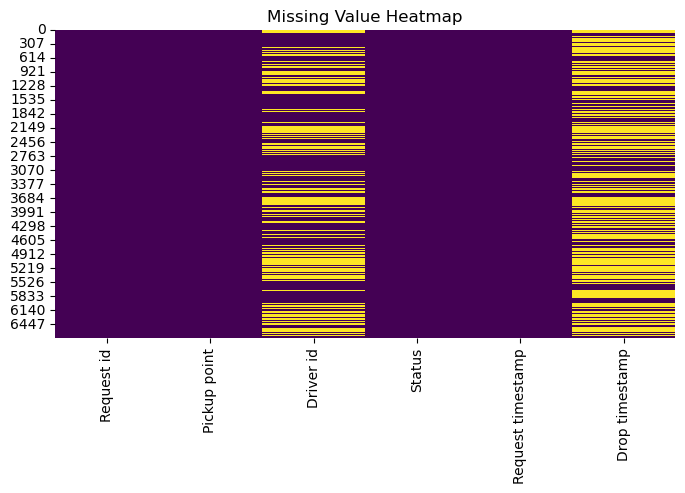

In [19]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [21]:
print("Pickup Point:\n", df['Pickup point'].value_counts())
print("\nStatus:\n", df['Status'].value_counts())


Pickup Point:
 Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

Status:
 Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


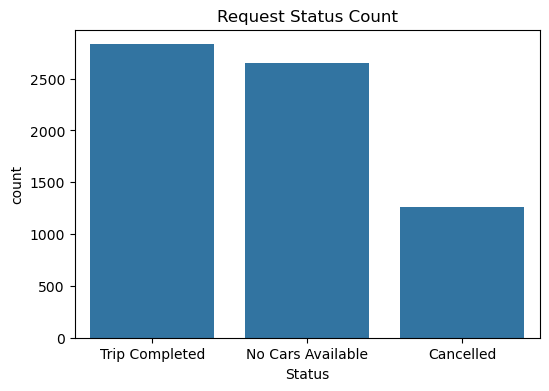

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Status", order=df["Status"].value_counts().index)
plt.title("Request Status Count")
plt.show()

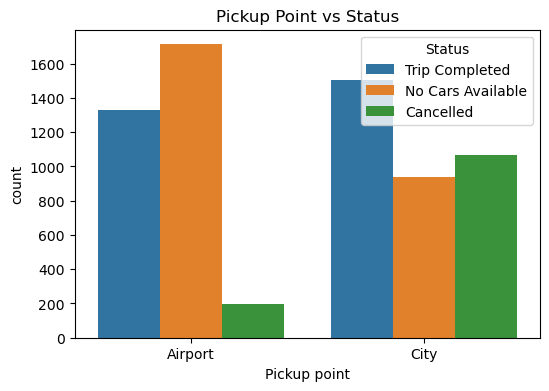

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pickup point", hue="Status")
plt.title("Pickup Point vs Status")
plt.show()

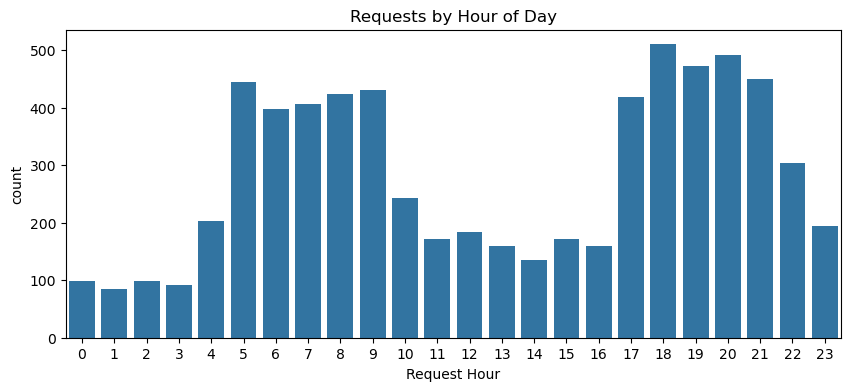

In [27]:
#Step 11: Requests Over Time
df["Request Hour"] = df["Request timestamp"].dt.hour
plt.figure(figsize=(10, 4))
sns.countplot(x="Request Hour", data=df, order=sorted(df["Request Hour"].unique()))
plt.title("Requests by Hour of Day")
plt.show()

In [35]:
df["Trip Duration (min)"] = (df["Drop timestamp"] - df["Request timestamp"]).dt.total_seconds() / 60
completed_trips = df[df["Status"] == "Trip Completed"]

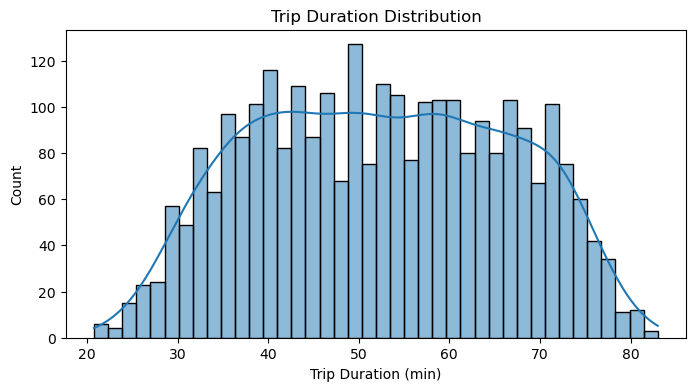

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(data=completed_trips, x="Trip Duration (min)", bins=40, kde=True)
plt.title("Trip Duration Distribution")
plt.show()